In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({'From_To': ['LoNDon_paris','MAdrid_miLAN','londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)','<Air France> (12)','(British Airways. )','12. Air France','"Swiss Air"']})

In [3]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


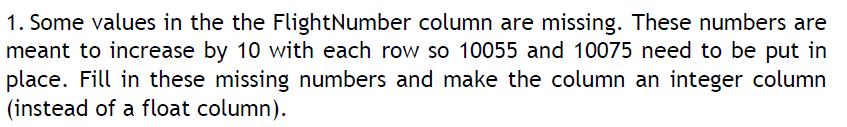

In [4]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)

In [5]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


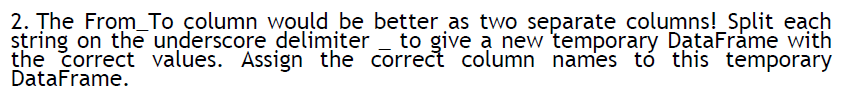

In [6]:
df_temp= df.From_To.str.split('_', expand=True)
df_temp.columns = ['From', 'To']

In [7]:
df_temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


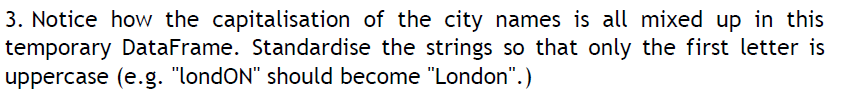

In [8]:
df_temp.From = df_temp.From.str.title()
df_temp.To = df_temp.To.str.title()

In [9]:
df_temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


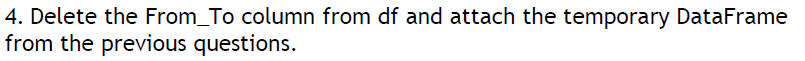

In [10]:
df=df.drop("From_To",axis=1).join(df_temp)

In [11]:
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


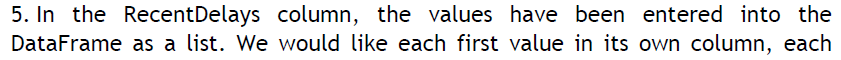
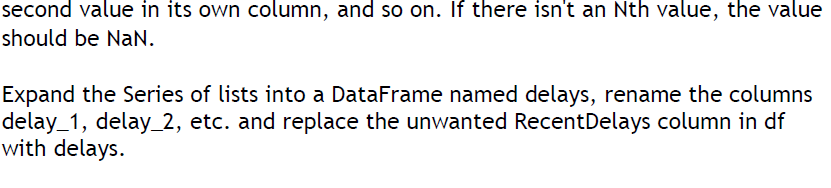

In [12]:
df_delays=pd.DataFrame(df["RecentDelays"].values.tolist())
df_delays.columns = ['delay_{}'.format(n) for n in range(1, len(df_delays.columns)+1)]

In [13]:
df_delays

,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [14]:
df=df.drop("RecentDelays" , axis=1).join(df_delays)

In [15]:
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM(!),London,Paris,23.0,47.0,NaN
1,10055,<Air France> (12),Madrid,Milan,NaN,NaN,NaN
2,10065,(British Airways. ),London,Stockholm,24.0,43.0,87.0
3,10075,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,"""Swiss Air""",Brussels,London,67.0,32.0,NaN
